In [5]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_sentiment.csv')
df_0 = df[df.sentiment == 0]
df_1 = df[df.sentiment == 1]
df_2 = df[df.sentiment == 2]

In [3]:
import matplotlib.pyplot as plt

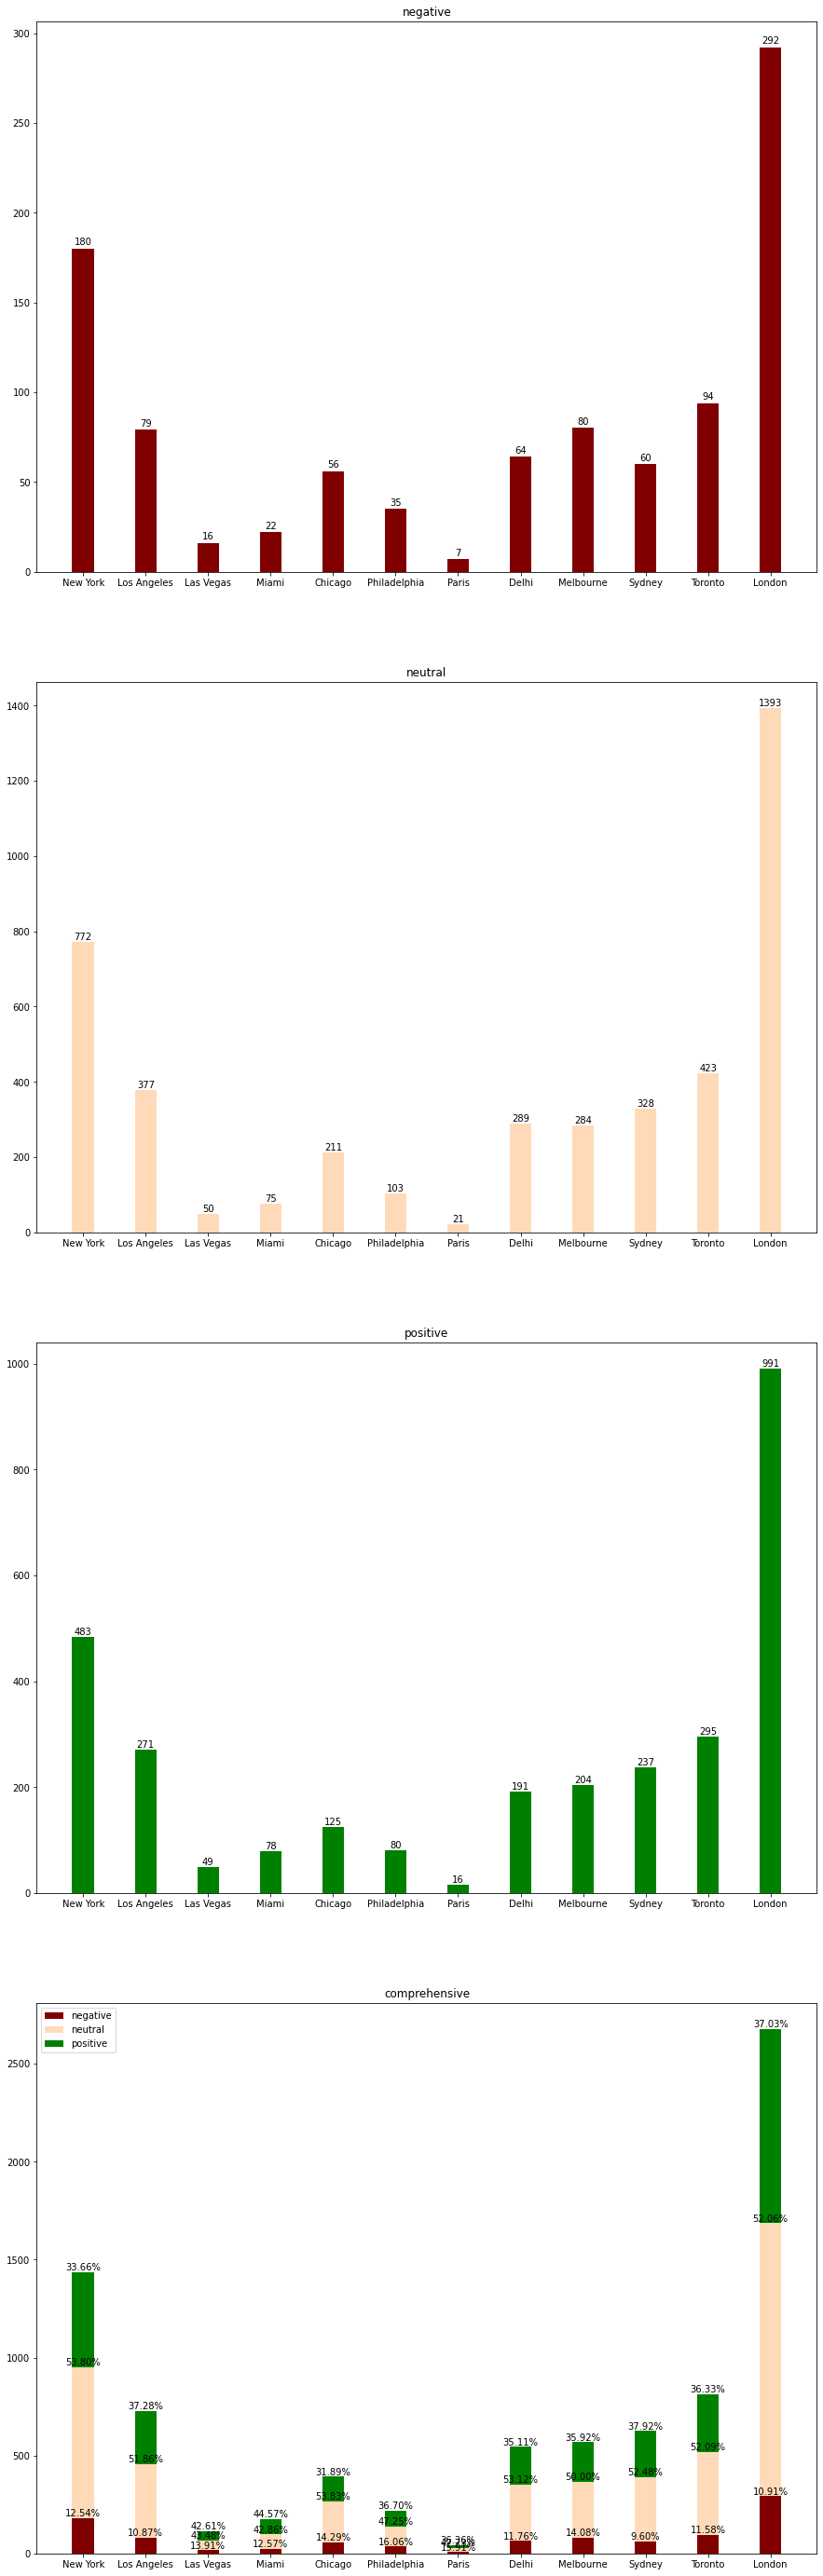

In [28]:
city_d0 = dict()
city_d1 = dict()
city_d2 = dict()
for c in df_0.location.unique():
    city_d0[c] = df_0[df_0.location ==c]
    city_d1[c] = df_1[df_1.location ==c]
    city_d2[c] = df_2[df_2.location ==c]
    
ind = np.arange(len(city_d0.keys()))
fig, ax = plt.subplots(4,1,figsize=(15,50))
width = 0.35

count0 = []
count1 = []
count2 = []

for v in city_d0.values():
    count0.append(len(v))

for v in city_d1.values():
    count1.append(len(v))

for v in city_d2.values():
    count2.append(len(v))

ax[0].bar(ind, count0, width = width, label = 'negative', color = 'maroon')
ax[1].bar(ind, count1, width = width, label = 'neutral', color = 'peachpuff')
ax[2].bar(ind, count2, width = width, label = 'positive', color = 'green')

ax[3].bar(ind, count0, width = width, label = 'negative', color = 'maroon')
ax[3].bar(ind, count1, width = width, bottom=count0, label = 'neutral', color = 'peachpuff')
s = [a+b for a, b in zip(count0, count1)]
ax[3].bar(ind, count2, width = width, bottom=s, label = 'positive', color = 'green')
s = [a+b+c for a, b, c in zip(count0, count1, count2)]

for a in ax:
    a.set_xticks(ind)
    a.set_xticklabels(list(city_d0.keys()))

for i, j, k, l in zip(ind, count0, count1, count2):
    ax[0].text(i, j+1, j, ha='center', va='bottom')
    ax[1].text(i, k+1, k, ha='center', va='bottom')
    ax[2].text(i, l+1, l, ha='center', va='bottom')
    ax[3].text(i, j+1, f"{j/(j+k+l)*100:.2f}%", ha='center', va='bottom')
    ax[3].text(i, j+k+1, f"{k/(j+k+l)*100:.2f}%", ha='center', va='bottom')
    ax[3].text(i, j+k+l+1, f"{l/(j+k+l)*100:.2f}%", ha='center', va='bottom')
ax[0].set_title('negative')
ax[1].set_title('neutral')
ax[2].set_title('positive')
ax[3].set_title('comprehensive')


plt.legend()
plt.show()

In [11]:
d = ['2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04']

city_ds = [city_d0, city_d1, city_d2]
city_times = []
for city_d in city_ds:
    city_time = dict()
    for k,v in city_d.items():
        city_time[k] = []
        for time in d:
            count = len(v[v['date'].str.contains(time)])
            city_time[k].append(count) 
    city_times.append(city_time)

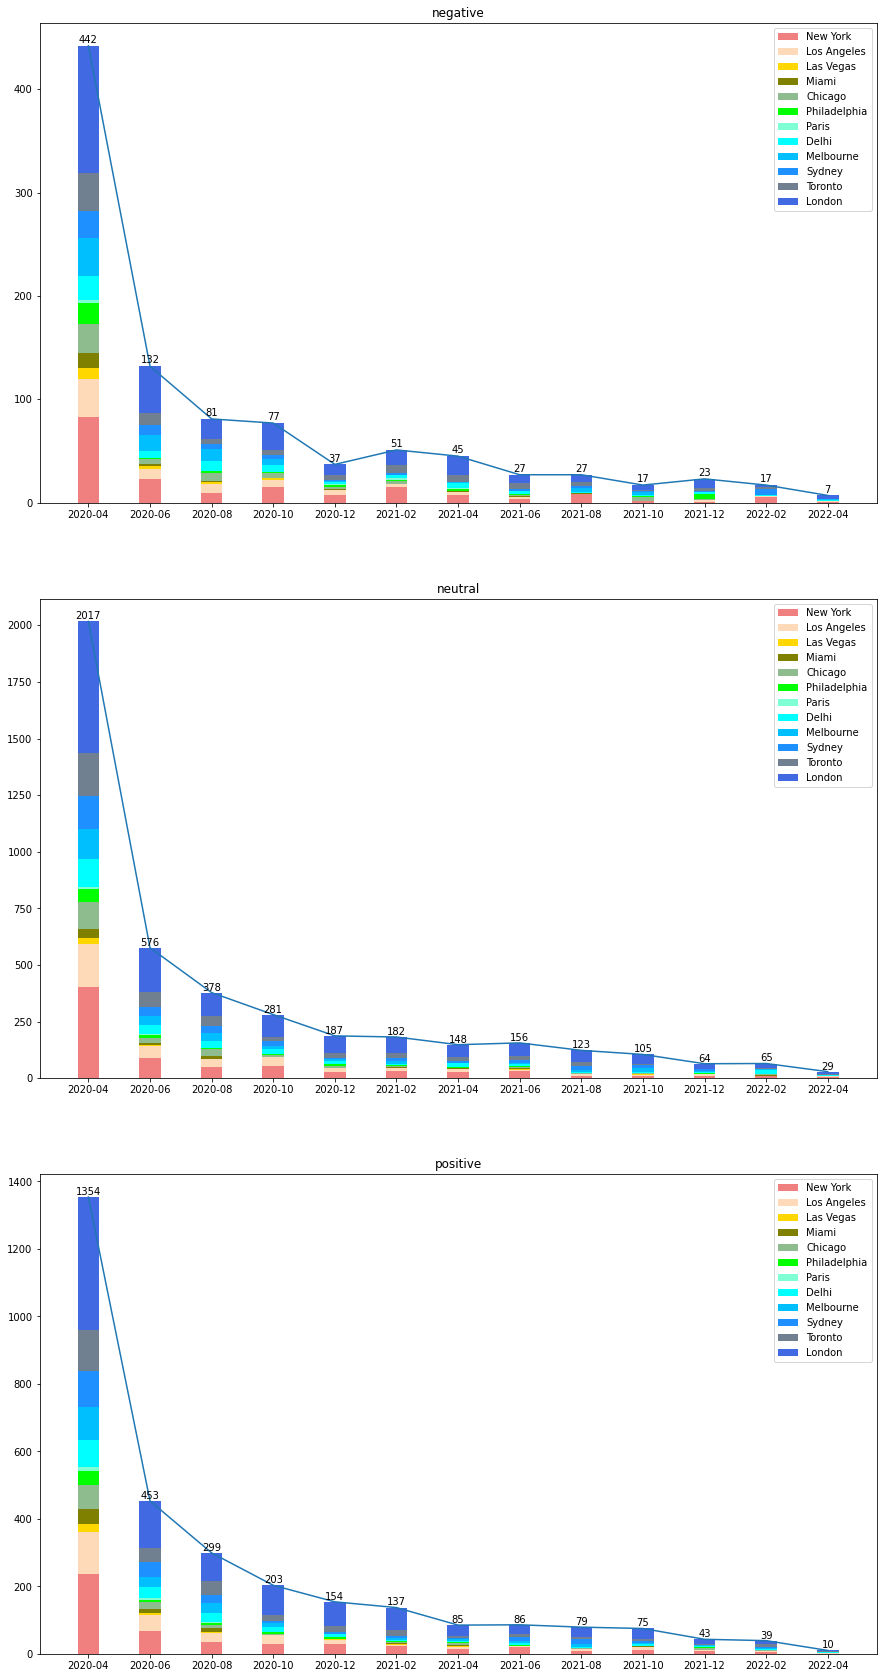

In [29]:
ind = np.arange(27//2)  # the x locations for the groups
width = 0.35
fig, axs = plt.subplots(3, 1, figsize=(15, 30))

c = ['lightcoral', 'peachpuff', 'gold', 'olive', 'darkseagreen',
     'lime', 'aquamarine', 'cyan', 'deepskyblue', 'dodgerblue',
     'slategray', 'royalblue', 'mediumpurple', 'plum', 'hotpink',
     'crimson', 'silver', 'darkred', 'maroon', 'sandybrown', 'wheat',
     'honeydew', 'limegreen', 'steelblue']

title_d = {0:'negative', 1:'neutral', 2:'positive'}
for n in range(3):
    c_iter = iter(c)
    #fig = figs[n]
    ax = axs[n]
    city_time = city_times[n]
    
    k = np.array(list(city_time.keys()))
    v = np.array(list(city_time.values()))
    s = [0]*27
    v_tmp = []
    for i in range(len(v)):
        tmp = []
        v1 = v[i]
        for j in range(1,len(v1),2):
            tmp.append(v1[j]+v1[j+1])
        v_tmp.append(tmp)
        
    for i in range(len(k)):
        if i == 0:
            ax.bar(ind, v_tmp[i], width, color=c[i], label=k[i])
            s = [a+b for a, b in zip(v_tmp[i], s)]
        else:
            ax.bar(ind, v_tmp[i], width, color=c[i], bottom=s, label=k[i])
            s = [a+b for a, b in zip(v_tmp[i], s)]

    ax.plot(ind, s)

    ax.set_xticks(ind)
    tmp = []
    for i in range(0, len(k), 2):
        tmp.append(d[i]+"~"+d[i+1])
    ax.set_xticklabels(d[2::2])

    for i, j in zip(ind, s):
        ax.text(i, j+1, j, ha='center', va='bottom')
    ax.legend()
    ax.set_title(title_d[n])
plt.show()